# Research on Megaline 

The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.  
The goal is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

## Step 1. Open the data file and study the general information


In [1]:
#import 
import pandas as pd
from functools import reduce
import math
import numpy as np
from termcolor import colored
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read csv file megaline_calls
megaline_calls = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_calls.csv')
#Show information about megaline calls
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [3]:
#Explorer the data
megaline_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
#Read csv file megaline_internet
megaline_internet = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_internet.csv')
#Show information about megaline internet
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [5]:
#Explorer the data
megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [6]:
#Read csv file megaline_messages
megaline_messages = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_messages.csv')
#Show information about megaline messages
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
#Explorer the data
megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [8]:
#Read csv file megaline_plans
megaline_plans = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_plans.csv')
#Show information about megaline plans
megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
#Explorer the data
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
#Read csv file megaline_users
megaline_users = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_users.csv')
#Show information about megaline users
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
#Explorer the data
megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


###   Conclusion

1. file megaline_calls column  'call_date' data type is object and should be datetime.
2. file megaline_internet column 'session_date' data type is object and should be datetime
3. file megaline_messages column 'message_date' data type is object and should be datetime
4. file megaline_users column 'reg_date' data type is object and should be datetime
5. file megaline_users column 'churn_date' data type is object and should be datetime
6. file megaline_users column 'churn_date' has 464 missing values.
   'churn_date' - the date the user stopped using the service (if the value is missing, the calling plan was being used when      this data was retrieved) - we are not going to use this column in our analysis , so NaN is "valid" value
7. file megaline_calls  column 'duration' should be rounded up for each row
8. file megaline_internet  column 'mb_used' should be rounded up for each row

## Data preprocessing

###  Data type replacement

In [12]:
#Replace 'call_date' data type to datetime
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'], format='%Y-%m-%dT%H:%M:%S')

In [13]:
#Replace 'session_date' data type to datetime
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'], format='%Y-%m-%dT%H:%M:%S')

In [14]:
#Replace 'message_date' data type to datetime
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'], format='%Y-%m-%dT%H:%M:%S')

In [15]:
#Replace 'reg_date' data type to datetime
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'], format='%Y-%m-%dT%H:%M:%S')

In [16]:
#Replace 'churn_date' data type to datetime
megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'], format='%Y-%m-%dT%H:%M:%S')

In [17]:
#Check the changes 
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [18]:
#Check the changes 
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [19]:
#Check the changes 
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [20]:
#Check the changes 
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### process calls with a duration of 0.0 minutes

In [21]:
num_calls = megaline_calls[megaline_calls['duration']==0 ]['duration'].count()
ratio_missing_calls = num_calls / megaline_calls.shape[0]
ratio_missing_calls

0.1948233927469416

### Conclusion

There are 19.5% of call with duration of 0.0.   
 This can be happen for call's that were less than 1 second. for exapmles:
 - call by mistake and hang up immediately
 - call the worg number and hang up immediately
 - quick calls like:'lets talk later', 'can't talk' .   
In order not to lose this significant data we are not going to delete them

In [22]:
#Add column 'month' containing the month only
megaline_calls['month'] = megaline_calls['call_date'].dt.month

In [23]:
#Round up 'duration' column
megaline_calls['duration_rounded'] = megaline_calls['duration'].apply(lambda x:math.ceil(x))

In [24]:
#Explorer data
megaline_calls

,id,user_id,call_date,duration,month,duration_rounded
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,9
137731,1499_200,1499,2018-10-20,10.89,10,11
137732,1499_201,1499,2018-09-21,8.12,9,9
137733,1499_202,1499,2018-10-10,0.37,10,1


In [25]:
#Add column 'month' containing the month only
megaline_messages['month'] = megaline_messages['message_date'].dt.month

In [26]:
#Add column 'month' containing the month only
megaline_internet['month'] = megaline_internet['session_date'].dt.month

In [27]:
#Round up the total use per month for each user.
#examples: 55 ->1000, 1010 ->2000
megaline_internet['rounded_mb_used'] = megaline_internet['mb_used'].apply(lambda x: int(math.ceil( x/ 1024.0)) * 1000)


In [28]:
#Explorer data
megaline_internet

,id,user_id,session_date,mb_used,month,rounded_mb_used
0,1000_13,1000,2018-12-29,89.86,12,1000
1,1000_204,1000,2018-12-31,0.00,12,0
2,1000_379,1000,2018-12-28,660.40,12,1000
3,1000_413,1000,2018-12-26,270.99,12,1000
4,1000_442,1000,2018-12-27,880.22,12,1000
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,1000
104821,1499_216,1499,2018-12-30,304.72,12,1000
104822,1499_217,1499,2018-09-22,292.75,9,1000
104823,1499_218,1499,2018-12-07,0.00,12,0


In [29]:
#The number of calls made and minutes used per month for each user
group_user_calls_per_month = megaline_calls.groupby(['user_id', 'month'])['duration_rounded'].agg(['sum','count']).reset_index()
#Rename column name
group_user_calls_per_month.rename(columns={'sum':'total_duration', 'count':'number_of_calls'},inplace=True)
group_user_calls_per_month

,user_id,month,total_duration,number_of_calls
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64
...,...,...,...,...
2253,1498,12,339,39
2254,1499,9,346,41
2255,1499,10,385,53
2256,1499,11,308,45


In [30]:
#pivot = megaline_calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc=['sum','count'])
#pivot

In [31]:
#The number of text messages sent per month for each user
group_user_text_message_per_month = megaline_messages.groupby(['user_id', 'month'])['message_date'].count().reset_index()
#Change column name
group_user_text_message_per_month.rename(columns={'message_date':'total_messages'},inplace=True)
group_user_text_message_per_month

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [32]:
#The volume of data used per month for each user
group_user_data_volume_per_month = megaline_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
#Round up the total use per month for each user.
#examples: 55 ->1000, 1010 ->2000
group_user_data_volume_per_month['rounded_mb_used'] = group_user_data_volume_per_month['mb_used'].apply(lambda x: int(math.ceil( x/ 1000.0)) * 1000)
group_user_data_volume_per_month.drop('mb_used', axis=1, inplace=True)
group_user_data_volume_per_month.rename(columns={'rounded_mb_used':'total_mb_used'},inplace=True)
group_user_data_volume_per_month

,user_id,month,total_mb_used
0,1000,12,2000
1,1001,8,7000
2,1001,9,14000
3,1001,10,23000
4,1001,11,19000
...,...,...,...
2272,1498,12,24000
2273,1499,9,13000
2274,1499,10,20000
2275,1499,11,17000


In [33]:
#group_user_data_volume_per_month['rounded_mb_used'] = group_user_data_volume_per_month['mb_used'].apply(lambda x: int(math.ceil( x/ 1000.0)) * 1000)
#group_user_data_volume_per_month

In [34]:
#Merge dataframes
data_frames = [group_user_calls_per_month, group_user_text_message_per_month, group_user_data_volume_per_month]
merged_user_info_per_month = reduce(lambda left,right:pd.merge(left, right, on=['user_id','month'], how='outer').fillna(0), data_frames)

In [35]:
#Merge plans dataFrame to merged_user_info_per_month 
merged_user_info_per_month = merged_user_info_per_month.merge(megaline_users[['user_id', 'plan']],how='left',on='user_id')

In [36]:
#Sort values by 'user_id' and 'month'
merged_user_info_per_month.sort_values(['user_id','month'],inplace=True)

In [37]:
merged_user_info_per_month

,user_id,month,total_duration,number_of_calls,total_messages,total_mb_used,plan
0,1000,12,124.0,16.0,11.0,2000.0,ultimate
1,1001,8,182.0,27.0,30.0,7000.0,surf
2,1001,9,315.0,49.0,44.0,14000.0,surf
3,1001,10,393.0,65.0,53.0,23000.0,surf
4,1001,11,426.0,64.0,36.0,19000.0,surf
...,...,...,...,...,...,...,...
2253,1498,12,339.0,39.0,0.0,24000.0,surf
2254,1499,9,346.0,41.0,0.0,13000.0,surf
2255,1499,10,385.0,53.0,0.0,20000.0,surf
2256,1499,11,308.0,45.0,0.0,17000.0,surf


In [38]:
megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [39]:
#Calculate revenue for ultimate 
def ultimate_revenue(row):
    total_duration = row['total_duration']
    total_messages = row['total_messages']
    mb_used = row['total_mb_used']
    
    #Get plan information 
    ultimate_plan = megaline_plans.query("plan_name == 'ultimate'")
    minutes_limit = ultimate_plan['minutes_included'].values[0]
    messages_limit = ultimate_plan['messages_included'].values[0]
    mb_limit = ultimate_plan['mb_per_month_included'].values[0] 
    monthly_charge = ultimate_plan['usd_monthly_pay'].values[0]
    usd_per_gb = ultimate_plan['usd_per_gb'].values[0]
    usd_per_message = ultimate_plan['usd_per_message'].values[0]
    usd_per_minute = ultimate_plan['usd_per_minute'].values[0]
    
    #Calculate revenue
    minute_above_limit = (total_duration - minutes_limit) * usd_per_minute if total_duration - minutes_limit  > 0 else 0
    messages_above_limit = (total_messages - messages_limit ) * usd_per_message if total_messages - messages_limit > 0 else 0
    mb_above_limit = (mb_used - mb_limit) * usd_per_gb if mb_used - mb_limit > 0 else 0
    
    return minute_above_limit + messages_above_limit + mb_above_limit + monthly_charge

#Calculate revenue for surf 
def surf_revenue(row):
    total_duration = row['total_duration']
    total_messages = row['total_messages']
    mb_used = row['total_mb_used']
    
    #Get plan information 
    surf_plan = megaline_plans.query("plan_name == 'surf'")    
    minutes_limit = surf_plan['minutes_included'].values[0]
    messages_limit = surf_plan['messages_included'].values[0]
    mb_limit = surf_plan['mb_per_month_included'].values[0] 
    monthly_charge = surf_plan['usd_monthly_pay'].values[0]
    usd_per_gb = surf_plan['usd_per_gb'].values[0]
    usd_per_message = surf_plan['usd_per_message'].values[0]
    usd_per_minute = surf_plan['usd_per_minute'].values[0]
    
    #Calculate revenue
    minute_above_limit = (total_duration - minutes_limit) * usd_per_minute if total_duration - minutes_limit  > 0 else 0
    messages_above_limit = (total_messages - messages_limit ) * usd_per_message if total_messages - messages_limit > 0 else 0
    mb_above_limit = ((mb_used - mb_limit) / 1000) * usd_per_gb if mb_used - mb_limit > 0 else 0
   
    return minute_above_limit + messages_above_limit + mb_above_limit + monthly_charge

#Proxy method that route plans to the correct revenue method
def proxy_plan_revenue(row):
    plan_name = row['plan']
    
   
    if plan_name ==  'ultimate':    
        return ultimate_revenue(row)
    elif plan_name == 'surf':
        return surf_revenue(row)

merged_user_info_per_month['revenue'] = merged_user_info_per_month.apply(proxy_plan_revenue, axis=1)



# test data
#testdataframe = merged_user_info_per_month.query('user_id ==1001 and month == 8')
#test1= testdataframe.apply(proxy_plan_revenue, axis=1)
#test1

In [40]:
#Explorer data
merged_user_info_per_month

,user_id,month,total_duration,number_of_calls,total_messages,total_mb_used,plan,revenue
0,1000,12,124.0,16.0,11.0,2000.0,ultimate,70.00
1,1001,8,182.0,27.0,30.0,7000.0,surf,20.00
2,1001,9,315.0,49.0,44.0,14000.0,surf,20.00
3,1001,10,393.0,65.0,53.0,23000.0,surf,96.49
4,1001,11,426.0,64.0,36.0,19000.0,surf,56.40
...,...,...,...,...,...,...,...,...
2253,1498,12,339.0,39.0,0.0,24000.0,surf,106.40
2254,1499,9,346.0,41.0,0.0,13000.0,surf,20.00
2255,1499,10,385.0,53.0,0.0,20000.0,surf,66.40
2256,1499,11,308.0,45.0,0.0,17000.0,surf,36.40


### Conclusion

Now we have one table that give us information about each user:
1. The plan that he has.
2. The total duration of calls.
3. Total messages that he sent.
4. total data that he consumed.  
Using this information we calculated the revenue for each user

##  Analyze the data

In [41]:
# minutes the users of each plan require per month
plan_minutes_per_month_pivot = merged_user_info_per_month.pivot_table(index='month',columns='plan', values='total_duration', aggfunc='sum')

#texts the users of each plan require per month
plan_messages_per_month_pivot = merged_user_info_per_month.pivot_table(index='month',columns='plan', values='total_messages', aggfunc='sum')

#volume of data the users of each plan require per month
plan_data_per_month_pivot = merged_user_info_per_month.pivot_table(index='month',columns='plan', values='total_mb_used', aggfunc='sum')

#volume of data the users of each plan require per month
plan_revenue_per_month_pivot = merged_user_info_per_month.pivot_table(index='month',columns='plan', values='revenue', aggfunc='sum')


In [42]:
plan_revenue_per_month_pivot

plan,surf,ultimate
month,,
1,40.00,280.0
2,325.17,490.0
3,1067.05,55720.0
4,2044.33,68390.0
5,3742.17,19950.0
6,4792.60,77210.0
7,7729.16,120050.0
8,10509.65,219730.0
9,11429.87,183820.0


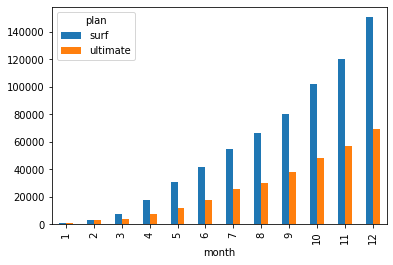

In [43]:
# usage of minutes per month for each plan
plan_minutes_per_month_pivot.plot(kind='bar')

1. Each month there is an increment of minutes been used for both plans
2. Users in 'surf' plan using more minutes comparing to users in 'ultemate' plan

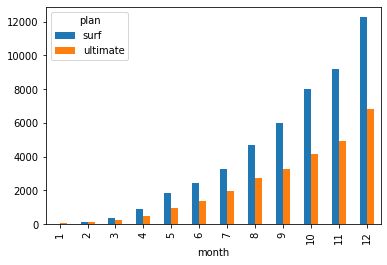

In [44]:
plan_messages_per_month_pivot.plot(kind='bar')

1. Each month there is an increment of messages been used for both plans.
2. Users in 'surf' plan using more messages comparing to users in 'ultemate' plan

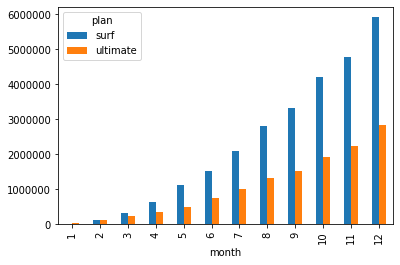

In [45]:
plan_data_per_month_pivot.plot(kind='bar')

1. Each month there is an increment of data been used
2. users in 'surf' plan using more data comparing to users in 'ultemate' plan

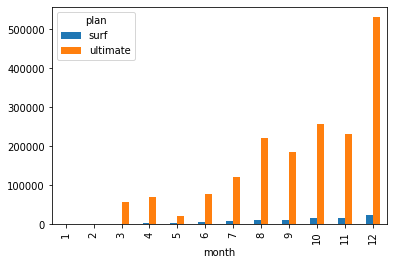

In [46]:
plan_revenue_per_month_pivot.plot(kind='bar')

1. There is an increment of the revenue in 'ultemate' plan 
2. The revenue in 'surf' plan remained almost the same. There is a tiny increment

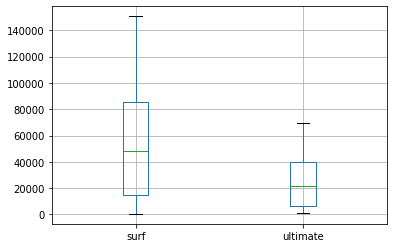

In [47]:
#Check for outliers
plan_minutes_per_month_pivot.boxplot()

There are no outliers in minutes table

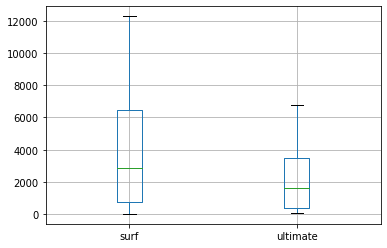

In [48]:
#Check for outliers
plan_messages_per_month_pivot.boxplot()

There are no outliers in messages table

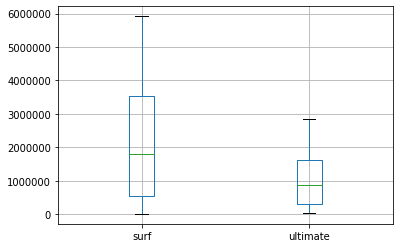

In [49]:
#Check for outliers
plan_data_per_month_pivot.boxplot()

There are no outliers in data table

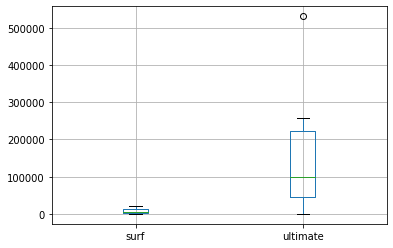

In [50]:
#Check for outliers
plan_revenue_per_month_pivot.boxplot()

There is an outleir in revenue table.

In [51]:
#Remove outliers from revenue 
plan_revenue_per_month_pivot = plan_revenue_per_month_pivot.query('ultimate < 500000')
plan_revenue_per_month_pivot

plan,surf,ultimate
month,,
1,40.00,280.0
2,325.17,490.0
3,1067.05,55720.0
4,2044.33,68390.0
5,3742.17,19950.0
6,4792.60,77210.0
7,7729.16,120050.0
8,10509.65,219730.0
9,11429.87,183820.0


In [52]:
#Calculate mean
#plan_minutes_per_month_pivot['mean'] = plan_minutes_per_month_pivot.mean(axis=1)
#plan_messages_per_month_pivot['mean'] = plan_messages_per_month_pivot.mean(axis=1)
#plan_data_per_month_pivot['mean'] = plan_data_per_month_pivot.mean(axis=1)

In [53]:
#Calculate variance
#plan_minutes_per_month_pivot['variance'] = plan_minutes_per_month_pivot.var(axis=1)
#plan_messages_per_month_pivot['variance'] = plan_messages_per_month_pivot.var(axis=1)
#plan_data_per_month_pivot['variance'] = plan_data_per_month_pivot.var(axis=1)

In [54]:
#Calculate std
#plan_minutes_per_month_pivot['std'] = plan_minutes_per_month_pivot.std(axis=1)
#plan_messages_per_month_pivot['std'] = plan_messages_per_month_pivot.std(axis=1)
#plan_data_per_month_pivot['std'] = plan_data_per_month_pivot.std(axis=1)

In [55]:
# minutes mean
minutes_mean = plan_minutes_per_month_pivot.mean()
#minutes variance
minutes_variance =  plan_minutes_per_month_pivot.var()
#minutes standard deviation
minutes_std = plan_minutes_per_month_pivot.std()

In [56]:
# messages mean
messages_mean = plan_messages_per_month_pivot.mean()
#messages variance
messages_variance = plan_messages_per_month_pivot.var()
#messages standard deviation
messages_std = plan_messages_per_month_pivot.std()

In [57]:
# data mean
data_mean = plan_data_per_month_pivot.mean()
#data variance
data_variance = plan_data_per_month_pivot.var()
#data standard deviation
data_std = plan_data_per_month_pivot.std()

In [58]:
print('The ' + colored('average minutes','red' , attrs=['bold'])  + ' usage in '+ colored('surf','red' , attrs=['bold'])  + ' plan is: {}'.format(math.ceil( minutes_mean['surf'])))
print('The ' + colored('variance of minutes','red' , attrs=['bold'])  + ' usage in '+ colored('surf','red' , attrs=['bold'])  + '  plan is: {} '.format(math.ceil(minutes_variance['surf'])))
print('The ' + colored('standard deviation of minutes','red' , attrs=['bold'])  + ' usage in '+ colored('surf','red' , attrs=['bold'])  + ' plan is: {} '.format(math.ceil(minutes_std['surf'])))
print()
print('The ' + colored('average messages','red' , attrs=['bold'])  + ' usage in '+ colored('surf','red' , attrs=['bold'])  + ' plan is: {}'.format(math.ceil( messages_mean['surf'])))
print('The ' + colored('variance of messages','red' , attrs=['bold'])  + ' usage in '+ colored('surf','red' , attrs=['bold'])  + ' plan is: {} '.format(math.ceil(messages_variance['surf'])))
print('The ' + colored('standard deviation of messages','red' , attrs=['bold'])  + ' usage in '+ colored('surf','red' , attrs=['bold'])  + ' plan is: {} '.format(math.ceil(messages_std['surf'])))
print()
print('The ' + colored('average data','red' , attrs=['bold'])  + ' usage in '+ colored('surf','red' , attrs=['bold'])  + ' plan is: {}'.format(math.ceil( data_mean['surf'])))
print('The ' + colored('variance of data','red' , attrs=['bold'])  + '  usage in '+ colored('surf','red' , attrs=['bold'])  + ' plan is: {} '.format(math.ceil(data_variance['surf'])))
print('The ' + colored('standard deviation of data','red' , attrs=['bold'])  + ' usage in '+ colored('surf','red' , attrs=['bold'])  + ' plan is: {} '.format(math.ceil(data_std['surf'])))
print()
print('The ' + colored('average minutes','red' , attrs=['bold'])  + ' usage in '+ colored('ultimate','red' , attrs=['bold'])  + ' plan is: {}'.format(math.ceil(minutes_mean['ultimate'])))
print('The ' + colored('variance of minutes','red' , attrs=['bold'])  + ' usage in '+ colored('ultimate','red' , attrs=['bold'])  + ' plan is: {} '.format(math.ceil(minutes_variance['ultimate'])))
print('The ' + colored('standard deviation of minutes','red' , attrs=['bold'])  + ' usage in '+ colored('ultimate','red' , attrs=['bold'])  + ' in surf plan is: {} '.format(math.ceil(minutes_std['ultimate'])))
print()
print('The ' + colored('average messages','red' , attrs=['bold'])  + ' usage in '+ colored('ultimate','red' , attrs=['bold'])  + ' plan is: {}'.format(math.ceil( messages_mean['ultimate'])))
print('The ' + colored('variance of messages','red' , attrs=['bold'])  + ' usage in '+ colored('ultimate','red' , attrs=['bold'])  + ' plan is: {} '.format(math.ceil(messages_variance['ultimate'])))
print('The ' + colored('standard deviation of messages','red' , attrs=['bold'])  + ' usage in '+ colored('ultimate','red' , attrs=['bold'])  + ' plan is: {} '.format(math.ceil(messages_std['ultimate'])))
print()
print('The ' + colored('average data','red' , attrs=['bold'])  + ' usage in '+ colored('ultimate','red' , attrs=['bold'])  + ' plan is: {}'.format(math.ceil( data_mean['ultimate'])))
print('The ' + colored('variance of data','red' , attrs=['bold'])  + ' usage in '+ colored('ultimate','red' , attrs=['bold'])  + ' plan is: {} '.format(math.ceil(data_variance['ultimate'])))
print('The ' + colored('standard deviation of data','red' , attrs=['bold'])  + ' usage in '+ colored('ultimate','red' , attrs=['bold'])  + ' plan is: {} '.format(math.ceil(data_std['ultimate'])))

The average minutes usage in surf plan is: 56202
The variance of minutes usage in surf  plan is: 2402963285 
The standard deviation of minutes usage in surf plan is: 49021 

The average messages usage in surf plan is: 4085
The variance of messages usage in surf plan is: 16107219 
The standard deviation of messages usage in surf plan is: 4014 

The average data usage in surf plan is: 2233334
The variance of data  usage in surf plan is: 3896840969697 
The standard deviation of data usage in surf plan is: 1974042 

The average minutes usage in ultimate plan is: 25827
The variance of minutes usage in ultimate plan is: 521959519 
The standard deviation of minutes usage in ultimate in surf plan is: 22847 

The average messages usage in ultimate plan is: 2254
The variance of messages usage in ultimate plan is: 4699501 
The standard deviation of messages usage in ultimate plan is: 2168 

The average data usage in ultimate plan is: 1063167
The variance of data usage in ultimate plan is: 8286812

In [59]:
minutes_data = {'average_minutes':[math.ceil( minutes_mean['surf']),math.ceil(minutes_mean['ultimate'])],
             'variance_minutes':[math.ceil(minutes_variance['surf']),math.ceil(minutes_variance['ultimate'])],
             'std_minutes':[math.ceil(minutes_std['surf']),math.ceil(minutes_std['ultimate'])]
            
            
            }

minutes_summary = pd.DataFrame(minutes_data,index=['surf','ultimate'])
minutes_summary

,average_minutes,variance_minutes,std_minutes
surf,56202,2402963285,49021
ultimate,25827,521959519,22847


Clients from 'surf' plan are talking more minutes in average than 'ultimate' plan

In [60]:
messages_data = {'average_messages ':[math.ceil( messages_mean['surf']),math.ceil(messages_mean['ultimate'])],
             'variance_messages ':[math.ceil(messages_variance['surf']),math.ceil(messages_variance['ultimate'])],
             'std_messages ':[math.ceil(messages_std['surf']),math.ceil(messages_std['ultimate'])]
            
            
            }

messages_summary = pd.DataFrame(messages_data,index=['surf','ultimate'])
messages_summary

,average_messages,variance_messages,std_messages
surf,4085,16107219,4014
ultimate,2254,4699501,2168


Clients from 'surf' plan are using more messages in average than 'ultimate' plan

In [61]:
mb_data = {'average_mb ':[math.ceil( data_mean['surf']),math.ceil(data_mean['ultimate'])],
             'variance_mb ':[math.ceil(data_variance['surf']),math.ceil(data_variance['ultimate'])],
             'std_mb ':[math.ceil(data_std['surf']),math.ceil(data_std['ultimate'])]
            
            
            }

mb_summary = pd.DataFrame(mb_data,index=['surf','ultimate'])
mb_summary

,average_mb,variance_mb,std_mb
surf,2233334,3896840969697,1974042
ultimate,1063167,828681242425,910320


Clients from 'surf' plan are using more data in average than 'ultimate' plan

### Conclusion

1. Each month there is an increment using minutes, messages and data in both plans
2. 'surf' users are using more minutes, messages and data then users in 'ultemate' plan and paying less money
3. The total revenue from all 'ultemate' users is significantly higher than total revenue from all 'surf' users and also increases every month

## Test the hypotheses

### The average revenue from users of Ultimate and Surf calling plans differs

 1. null hypothesis H₀ - "The average revenue from users of Ultimate and Surf calling plans are equal."
 2. alternative hypothesis H₁ - "The average revenue from users of Ultimate and Surf calling plans differs."

In [62]:
#Explorer the data
merged_user_info_per_month

,user_id,month,total_duration,number_of_calls,total_messages,total_mb_used,plan,revenue
0,1000,12,124.0,16.0,11.0,2000.0,ultimate,70.00
1,1001,8,182.0,27.0,30.0,7000.0,surf,20.00
2,1001,9,315.0,49.0,44.0,14000.0,surf,20.00
3,1001,10,393.0,65.0,53.0,23000.0,surf,96.49
4,1001,11,426.0,64.0,36.0,19000.0,surf,56.40
...,...,...,...,...,...,...,...,...
2253,1498,12,339.0,39.0,0.0,24000.0,surf,106.40
2254,1499,9,346.0,41.0,0.0,13000.0,surf,20.00
2255,1499,10,385.0,53.0,0.0,20000.0,surf,66.40
2256,1499,11,308.0,45.0,0.0,17000.0,surf,36.40


In [63]:
#Get list of revenues for 'surf' plan
surf_revenue = merged_user_info_per_month.query("plan == 'surf'")['revenue']
#Get list of revenues for 'ultimate' plan
surf_ultimate = merged_user_info_per_month.query("plan == 'ultimate'")['revenue']

In [64]:
#Check hypothesis
hypothesis_results = st.ttest_ind(surf_revenue, surf_ultimate,equal_var= False)
alpha = 0.05

print('p-value:',hypothesis_results.pvalue)
if (hypothesis_results.pvalue < alpha):
    print("We reject the null hypothesis H₀ - The average revenue from users of Ultimate and Surf calling plans are equal")
else:
    print("We can't reject the null hypothesis - The average revenue from users of Ultimate and Surf calling plans are equal")

p-value: 5.7083613800280655e-08
We reject the null hypothesis H₀ - The average revenue from users of Ultimate and Surf calling plans are equal


### The average revenue from users in NY-NJ area is different from that of the users from other regions.

1. null hypothesis H₀ - "The average revenue from users in NY-NJ area is equal from that of the users from other regions."
2. alternative hypothesis H₁ - "The average revenue from users in NY-NJ area is different from that of the users from other regions."

In [65]:
#Get users from 'NY-NJ' region
NY_NJ_users = megaline_users[megaline_users.city.str.contains('NY-NJ')]['user_id']
#Get users from other regions that are NOT 'NY-NJ' 
other_regions_users = megaline_users.query('user_id not in @NY_NJ_users')['user_id']

In [66]:
NY_NJ_revenue = merged_user_info_per_month.query('user_id in @NY_NJ_users')['revenue']
other_regions_revenue = merged_user_info_per_month.query('user_id not in @NY_NJ_users')['revenue']

In [67]:
#Check hypothesis
hypothesis_results = st.ttest_ind(NY_NJ_revenue, other_regions_revenue,equal_var= False)
alpha = 0.05

print('p-value:',hypothesis_results.pvalue)
if (hypothesis_results.pvalue < alpha):
    print("We reject the null hypothesis H₀ - The average revenue from users in NY-NJ area is equal from that of the users from other regions")
else:
    print("We can't reject the null hypothesis H₀ - The average revenue from users in NY-NJ area is equal from that of the users from other regions")

p-value: 0.6024149404965126
We can't reject the null hypothesis H₀ - The average revenue from users in NY-NJ area is equal from that of the users from other regions


### Conclusion

1. The average revenue from users of Ultimate and Surf calling plans are differs.
2. The average revenue from users in NY-NJ area is equal to average revenue from users from other regions

## overall conclusion

1. Each month there is an increment using minutes, messages and data in both plans
2. 'surf' users are using more minutes, messages and data then users in 'ultemate' plan and paying less money
3. 'ultemate' users are paying more money and consuming less minutes, messages and data.
4. The total revenue from all 'ultemate' users is significantly higher than total revenue from all 'surf' users and also increases every month
5. The average revenue from users of Ultimate and Surf calling plans are differs.
6. The average revenue from users in NY-NJ area is equal to average revenue from users from other regions
7. 'ultemate' plan is more profitable 
8. Advertising budget should be focused on 'ultemate' users